<a href="https://colab.research.google.com/github/cchavezlo/DataVisualization/blob/main/BVApi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from io import StringIO
import requests
import time


In [ ]:
import requests
import json

response = requests.get("https://restcountries.com/v3.1/all")
data = response.json()

with open("paises.json", "w") as f:
    json.dump(data, f)

df = spark.read.json("paises.json")
df.select("name.common", "region", "population", "area").show(10)
df_clean = df.filter(df.population > 1000000).dropna(subset=["region"])
df_clean = df.filter(df.population > 1000000).dropna(subset=["region"])
df_clean.write.format("delta").mode("overwrite").save("data/output/paises_delta")


NameError: name 'spark' is not defined

⏸️ Sin señal clara de compra o venta en este momento


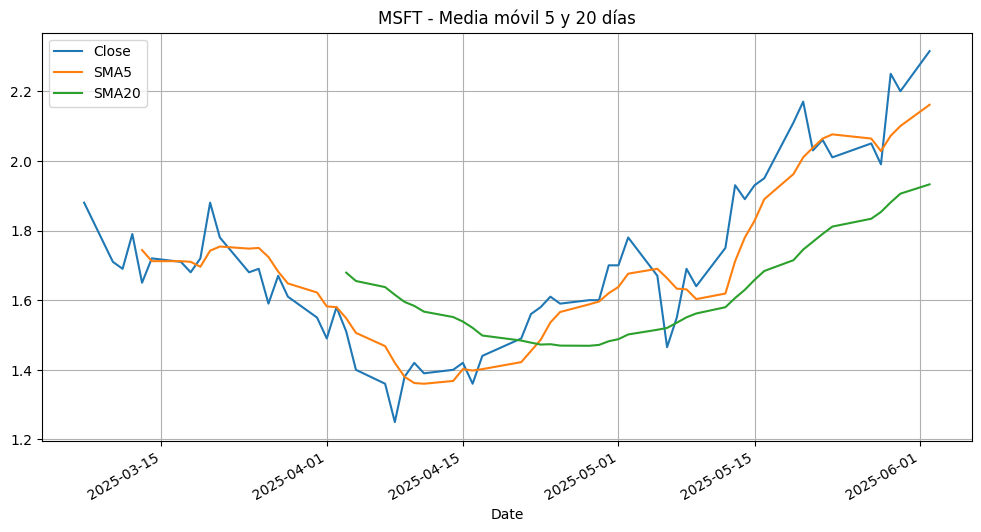

In [ ]:
# Descargar datos de los últimos 60 días para tener contexto
msft = yf.Ticker("BDTX")
hist = msft.history(period="60d")

# Calcular medias móviles
hist['SMA5'] = hist['Close'].rolling(window=5).mean()
hist['SMA20'] = hist['Close'].rolling(window=20).mean()

# Señal de compra/venta básica:
# Si SMA5 cruza por encima de SMA20 → señal de compra
# Si SMA5 cruza por debajo de SMA20 → señal de venta
if hist['SMA5'].iloc[-1] > hist['SMA20'].iloc[-1] and hist['SMA5'].iloc[-2] < hist['SMA20'].iloc[-2]:
    print("📈 Señal: Podría ser un buen momento para COMPRAR (cruce alcista)")
elif hist['SMA5'].iloc[-1] < hist['SMA20'].iloc[-1] and hist['SMA5'].iloc[-2] > hist['SMA20'].iloc[-2]:
    print("📉 Señal: Podría ser un momento para VENDER (cruce bajista)")
else:
    print("⏸️ Sin señal clara de compra o venta en este momento")

# (Opcional) Graficar
hist[['Close', 'SMA5', 'SMA20']].plot(figsize=(12, 6), title='MSFT - Media móvil 5 y 20 días')
plt.grid()
plt.show()


In [ ]:
url = "https://finviz.com/screener.ashx?v=111&f=cap_microover,geo_usa,sh_price_u5,sh_volover300&ft=4"

In [ ]:

# Simular navegador con headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Buscar todas las tablas
tables = soup.find_all("table")

# La tabla con datos de acciones suele estar en la posición 17 (puede variar, se puede ajustar)
for i, table in enumerate(tables):
    try:
        df = pd.read_html(StringIO(str(table)))[0]
        if "Ticker" in df.columns:
            stock_df = df
            break
    except Exception:
        continue

# Mostrar los 10 primeros resultados relevantes
print(stock_df[['Ticker', 'Company', 'Price', 'Change', 'Volume']].head(10))

NameError: name 'url' is not defined

In [ ]:
api_key = 'd0lni49r01qpni308dhgd0lni49r01qpni308di0'

# Buscar acciones menores de $5 (tienes que tener una lista o usar un screener previo)
symbol = 'AAPL'  # reemplaza por tus tickers

# Obtener datos de cotización
url = f'https://finnhub.io/api/v1/quote?symbol={symbol}&token={api_key}'
data = requests.get(url).json()
print(data)

{'c': 201.46, 'd': 0.61, 'dp': 0.3037, 'h': 202.13, 'l': 199.2, 'o': 199.2, 'pc': 200.85, 't': 1748876443}


In [ ]:

# Lista de tickers (puedes obtenerla de un CSV real con tickers válidos)
tickers = ['SIRI', 'ZNGA', 'NOK', 'GPRO', 'FCEL']  # Aquí irían cientos si tienes el CSV

# Resultados
acciones_baratas = []

for ticker in tickers:
    try:
        data = yf.Ticker(ticker).info
        price = data.get('currentPrice')
        if price and price < 5:
            acciones_baratas.append((ticker, price))
        time.sleep(1)  # Para evitar bloqueo por muchas peticiones
    except Exception as e:
        print(f"Error con {ticker}: {e}")

# Mostrar resultados
df = pd.DataFrame(acciones_baratas, columns=["Ticker", "Precio"])
print(df)


  Ticker  Precio
0   GPRO  0.6034
1   FCEL  4.9700


Cada sector tiene su “rango normal” de P/E:

Tech: 20–40 (alto crecimiento)

Energía: 10–15

Financiero: 10–15

Consumo básico: 15–25

¿Es un buen rendimiento?
Rendimiento	Interpretación
0%–1%	Muy bajo, común en empresas de alto crecimiento (tech)
2%–4%	Moderado, típico en empresas estables
5% o más	Alto, pero puede haber riesgo o baja valorización


In [ ]:
api_key = 'd0lni49r01qpni308dhgd0lni49r01qpni308di0'
symbol = 'ABNB'

# Datos fundamentales
fundamentals = requests.get(f'https://finnhub.io/api/v1/stock/metric?symbol={symbol}&metric=all&token={api_key}').json()

# Precio actual
quote = requests.get(f'https://finnhub.io/api/v1/quote?symbol={symbol}&token={api_key}').json()

# Noticias
news = requests.get(f'https://finnhub.io/api/v1/company-news?symbol={symbol}&from=2024-05-01&to=2024-05-19&token={api_key}').json()

print(f"Precio actual: {quote['c']}")
print(f"PE Ratio: {fundamentals['metric']['peBasicExclExtraTTM']}")
print(f"EPS: {fundamentals['metric']['epsInclExtraItemsTTM']}")
#print(f"Dividend Yield: {fundamentals['metric']['dividendYieldIndicatedAnnual']}")

Precio actual: 129.2
PE Ratio: 31.8389
EPS: 3.9545


In [10]:
API_KEY = "d0lni49r01qpni308dhgd0lni49r01qpni308di0"  # Cambia esto por tu API key de Finnhub
exchange = "US"

# Paso 1: Obtener lista de empresas
url = f"https://finnhub.io/api/v1/stock/symbol?exchange={exchange}&token={API_KEY}"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
df = df[['symbol', 'description']]
df.columns = ['Ticker', 'Company']

# Paso 2: Obtener el rubro (sector) de cada empresa
sectors = []
for ticker in df['Ticker']:
    profile_url = f"https://finnhub.io/api/v1/stock/profile2?symbol={ticker}&token={API_KEY}"
    r = requests.get(profile_url)
    profile = r.json()
    sectors.append(profile.get('finnhubIndustry', 'Desconocido'))

    time.sleep(0.2)  # evitar sobrepasar límites de la API

# Agregar columna "Rubro"
df['Rubro'] = sectors

# Guardar CSV
df.to_csv("tickers_con_rubro.csv", index=False)
print("Archivo generado: tickers_con_rubro.csv")


KeyboardInterrupt: 

In [ ]:
API_KEY = "d0lni49r01qpni308dhgd0lni49r01qpni308di0"  # Cambia esto por tu API key de Finnhub
exchange = "US"

# Paso 1: Obtener lista de empresas
url = f"https://finnhub.io/api/v1/stock/symbol?exchange={exchange}&token={API_KEY}"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
df = df[['symbol', 'description']]
df.columns = ['Ticker', 'Company']
# Guardar CSV
df.to_csv("tickers_con_rubro.csv", index=False)
print("Archivo generado: tickers_con_rubro.csv")

Archivo generado: tickers_con_rubro.csv


In [ ]:
API_KEY = "d0lni49r01qpni308dhgd0lni49r01qpni308di0"  # Reemplaza con tu API key de Finnhub
exchange = "US"

# Paso 1: Obtener lista de empresas del exchange US
url = f"https://finnhub.io/api/v1/stock/symbol?exchange={exchange}&token={API_KEY}"
response = requests.get(url)
data = response.json()

# Convertir a DataFrame y seleccionar columnas relevantes
df = pd.DataFrame(data)
df = df[['symbol', 'description']]
df.columns = ['Ticker', 'Company']

# Paso 2: Obtener el rubro (sector) de cada empresa
sectors = []
for ticker in df['Ticker']:
    profile_url = f"https://finnhub.io/api/v1/stock/profile2?symbol={ticker}&token={API_KEY}"
    r = requests.get(profile_url)
    profile = r.json()

    sector = profile.get('finnhubIndustry', 'Desconocido')
    sectors.append(sector)

    time.sleep(0.2)  # Evitar sobrepasar el límite de la API

# Agregar columna "Rubro"
df['Rubro'] = sectors

# Filtrar solo empresas del rubro "Technology"
df_tecnologia = df[df['Rubro'].str.lower() == 'technology']

# Guardar archivo
df_tecnologia.to_csv("tickers_tecnologia.csv", index=False)
print("Archivo generado: tickers_tecnologia.csv")

KeyboardInterrupt: 

🔍 Análisis para AQN
⏸️ No hay cruce relevante. Se recomienda esperar una señal más clara.
🧠 Recomendación: ESPERAR


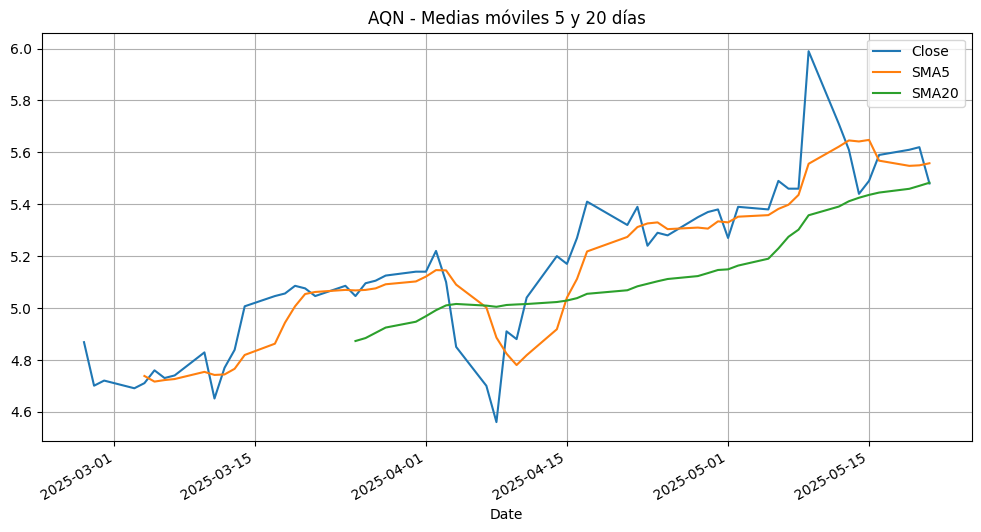

In [ ]:

# Descargar datos de los últimos 60 días
ticker = "AQN"
bdtx = yf.Ticker(ticker)
hist = bdtx.history(period="60d")

# Calcular medias móviles
hist['SMA5'] = hist['Close'].rolling(window=5).mean()
hist['SMA20'] = hist['Close'].rolling(window=20).mean()

# Lógica de cruce de medias móviles
sma5_today = hist['SMA5'].iloc[-1]
sma20_today = hist['SMA20'].iloc[-1]
sma5_yesterday = hist['SMA5'].iloc[-2]
sma20_yesterday = hist['SMA20'].iloc[-2]

# Determinar señal
if sma5_today > sma20_today and sma5_yesterday < sma20_yesterday:
    decision = "COMPRAR"
    mensaje = "📈 Señal de CRUCE ALCISTA: La media móvil de corto plazo (5 días) superó a la de 20 días."
elif sma5_today < sma20_today and sma5_yesterday > sma20_yesterday:
    decision = "VENDER"
    mensaje = "📉 Señal de CRUCE BAJISTA: La media móvil de corto plazo (5 días) cayó por debajo de la de 20 días."
else:
    decision = "ESPERAR"
    mensaje = "⏸️ No hay cruce relevante. Se recomienda esperar una señal más clara."

# Imprimir resultado
print(f"🔍 Análisis para {ticker}")
print(mensaje)
print(f"🧠 Recomendación: {decision}")

# Graficar
hist[['Close', 'SMA5', 'SMA20']].plot(figsize=(12, 6), title=f'{ticker} - Medias móviles 5 y 20 días')
plt.grid()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt



# Lista de tickers a evaluar
tickers = ["AQN", "MSFT", "AAPL", "GOOGL", "AMZN", "TSLA"]  # puedes modificar esta lista

# Lista para almacenar resultados
recomendaciones = []

# Análisis de cada ticker
for ticker in tickers:
    try:
        print(f"\n🔍 Analizando {ticker}...")
        stock = yf.Ticker(ticker)
        hist = stock.history(period="60d")

        if len(hist) < 21:
            print("⚠️ No hay suficientes datos para calcular SMA20. Se omite.")
            continue

        # Calcular medias móviles
        hist['SMA5'] = hist['Close'].rolling(window=5).mean()
        hist['SMA20'] = hist['Close'].rolling(window=20).mean()

        # Cruce reciente
        sma5_today = hist['SMA5'].iloc[-1]
        sma20_today = hist['SMA20'].iloc[-1]
        sma5_yesterday = hist['SMA5'].iloc[-2]
        sma20_yesterday = hist['SMA20'].iloc[-2]

        if sma5_today > sma20_today and sma5_yesterday < sma20_yesterday:
            decision = "COMPRAR"
            mensaje = "📈 Cruce alcista detectado."
        elif sma5_today < sma20_today and sma5_yesterday > sma20_yesterday:
            decision = "VENDER"
            mensaje = "📉 Cruce bajista detectado."
        else:
            decision = "ESPERAR"
            mensaje = "⏸️ Sin cruce relevante."

        recomendaciones.append({
            "Ticker": ticker,
            "Decision": decision,
            "Mensaje": mensaje
        })

        print(f"🧠 Recomendación: {decision} - {mensaje}")

    except Exception as e:
        print(f"❌ Error al procesar {ticker}: {str(e)}")

# Convertir a DataFrame
df_resultado = pd.DataFrame(recomendaciones)

# Mostrar solo los que conviene comprar
print("\n📋 Tickers con señal de COMPRA:")
compras = df_resultado[df_resultado["Decision"] == "COMPRAR"]
print(compras)

# (Opcional) Guardar CSV
compras.to_csv("tickers_para_comprar.csv", index=False)
